In [29]:
import numpy as np
import scipy
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [274]:
def hz_to_cents(freq_hz, ref_hz=32.0):
    """ convert frequency values from Hz to cents
    """
    freq_cents = 1200.0 * np.log2(freq_hz/ref_hz)
    return freq_cents

In [477]:
def get_vibrato_params(x, y, vib_thresh=0.25):
    y_cents = hz_to_cents(y)
    poly_coeffs = np.polynomial.polynomial.polyfit(x, y_cents, 5)
    y_poly = np.polynomial.polynomial.polyval(x, poly_coeffs)
    y_diff = y_cents - y_poly
    y_hilbert = scipy.signal.hilbert(y_diff)
    y_sin = y_diff/np.abs(y_hilbert)

    f, p = get_frequency(x, y_sin)
    y_sinfit = np.cos(2.*np.pi*f*x - p)
    y_sinfit_diff = np.abs(y_sin - y_sinfit)
    diff_thresh = np.zeros(y_sinfit.shape)
    coverage = np.zeros(y_sinfit.shape)
    
    period = x[1] - x[0]
    n_samples = ((1.0/period)/f)/2.0
    ideal_indexes = np.arange(0, int(np.ceil(len(y)/n_samples)))*n_samples
    best_indexes = list(np.round(ideal_indexes).astype(int))
    best_indexes.append(len(y))
    
    diffs = np.zeros((len(best_indexes) - 1, ))
    for k, (i, j) in enumerate(zip(best_indexes[:-1], best_indexes[1:])):
        diffs[k] = np.mean(y_sinfit_diff[i:j])
        diff_thresh[i:j] = diffs[k]
    
    coverage = diff_thresh <= vib_thresh
    diff_coverage = [d <= vib_thresh for d in diffs]
    
    if sum(diff_coverage) <= 3:
        coverage[:] = False

    vib_coverage = coverage.mean()
    
    if vib_coverage > 0:
        extent = np.mean(np.abs(y_hilbert)[coverage])
        rate = f
    else:
        extent = 0.0
        rate = 0.0

    print "vibrato coverage = {}".format(vib_coverage)
    print "vibrato rate = {}".format(rate)
    print "vibrato extent= {}".format(extent)
    
    y_vib = extent*y_sinfit
    y_vib[~coverage] = 0
    y_modelfit = y_vib + y_poly
    
    plt.figure(figsize=(15,12))
    
    plt.subplot(6, 1, 1)
    plt.plot(x, y_cents, 'b', label='contour')
    plt.plot(x, y_poly, 'r', label='polynomial fit')
    plt.legend(loc='best')
    
    plt.subplot(6, 1, 2)
    plt.plot(x, y_diff, 'b', label='polynomial residual')
    plt.plot(x, np.abs(y_hilbert), 'r', label='amplitude envelope')
    plt.legend(loc='best')
    
    plt.subplot(6, 1, 3)
    plt.plot(x, y_sin, 'b', label='sinusoidal residual')
    plt.plot(x, y_sinfit, 'r', label='fit')
    plt.legend(loc='best')
    
    plt.subplot(6, 1, 4)
    plt.plot(x, y_sinfit_diff, 'b')
    plt.plot(x, diff_thresh, 'r')
    
    plt.subplot(6, 1, 5)
    plt.plot(x, coverage, 'r')

    plt.subplot(6, 1, 6)
    plt.plot(x, y_cents, 'b', label='contour')
    plt.plot(x, y_modelfit, 'r', label='modelfit')

In [475]:
def get_frequency(x, y):
    freqs = np.arange(3, 30, 0.1)
    templates = np.exp(2.0*np.pi*1j*np.multiply.outer(freqs, x))
    dot_prod = np.dot(templates, y)
    dot_prod_mag = np.abs(dot_prod)
    peak_idx = list(scipy.signal.argrelmax(dot_prod_mag)[0])

    max_peak_idx = np.argmax(dot_prod_mag[peak_idx])
    idx = peak_idx[max_peak_idx]

    freq = freqs[idx]
#     plt.plot(freqs, dot_prod_mag)
#     plt.plot(freqs[peak_idx], dot_prod_mag[peak_idx], 'or')
#     plt.plot(freq, dot_prod_mag[idx], 'o')
    phase = np.angle(dot_prod[idx])
    return freq, phase

1
vibrato coverage = 0.442367601246
vibrato rate = 6.1
vibrato extent= 52.2261997708


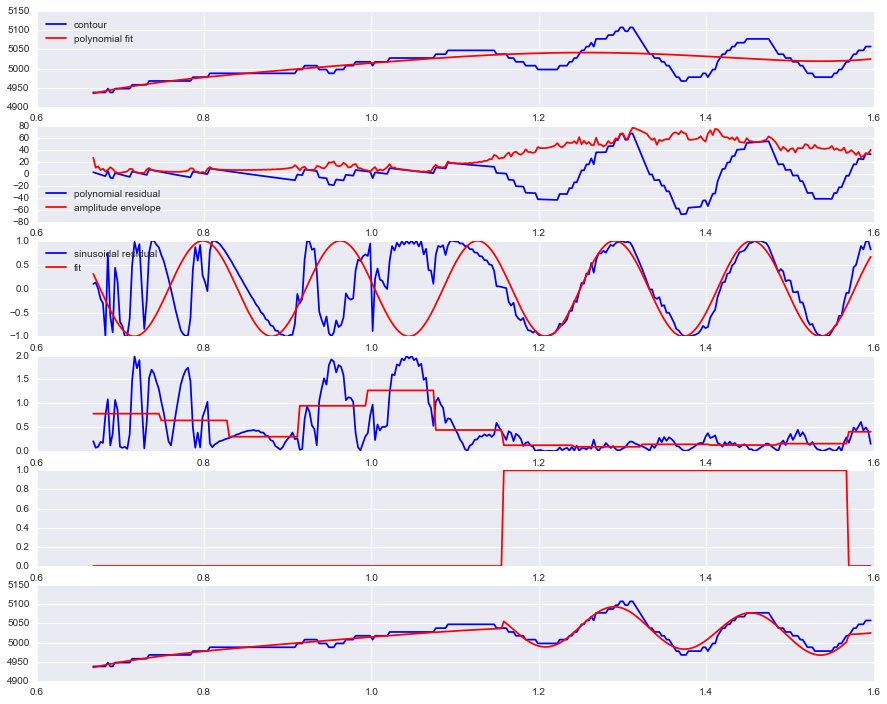

In [514]:
i=np.random.choice(list(ctr.nums))
i=1
print i
x = ctr.contour_times(i)
y = ctr.contour_freqs(i)
get_vibrato_params(x, y)

In [500]:
from motif import core

In [4]:
ctr = core.Contours('/Datasets/MedleyDB_Mixes/MusicDelta_ChineseXinJing_MIX.wav', 'salamon')

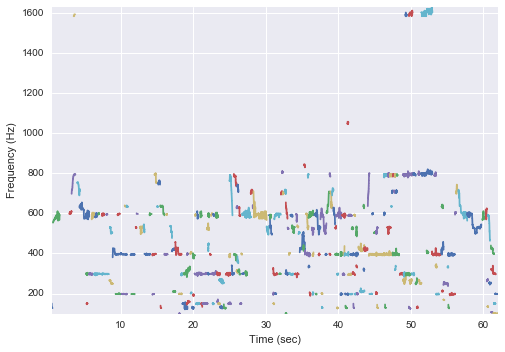

In [6]:
ctr.plot()
# plt.axis([0,10,0,1000])

In [315]:
np.random.choice([1,2,3])

3

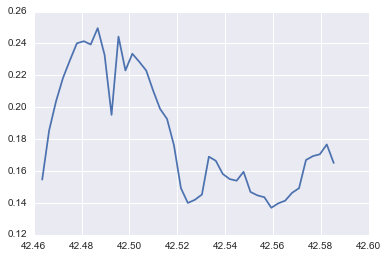

In [473]:
i=np.random.choice(list(ctr.nums))
x = ctr.contour_times(i)
y = ctr.contour_freqs(i)
z = ctr.contour_salience(i)
plt.plot(x, z)

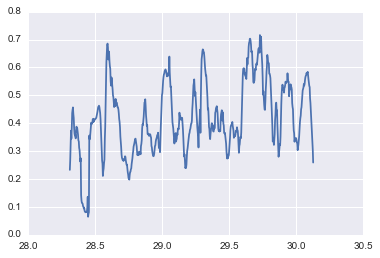